In [2]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [62]:
df = pd.read_csv("./iot_dataset.csv")

In [63]:
df.head(10)

,created_at,entry_id,voltage,current,power,energy,frequency,power factor,temp
0,2/15/2025 8:00,1,190.66,0.030,6.1,0.007,50.39,0.59,29.6
1,2/15/2025 8:00,2,238.80,0.039,76.6,0.080,49.89,0.69,41.5
2,2/15/2025 8:01,3,180.46,0.054,10.8,0.012,50.40,0.40,28.8
3,2/15/2025 8:02,4,181.76,0.078,13.2,0.013,49.56,0.56,30.3
4,2/15/2025 8:03,5,256.70,0.077,281.7,0.337,50.29,0.98,109.4
5,2/15/2025 8:03,6,221.78,0.027,90.5,0.091,50.20,0.62,42.8
6,2/15/2025 8:04,7,207.59,0.033,7.8,0.008,50.25,0.56,29.4
7,2/15/2025 8:05,8,215.07,0.043,8.3,0.010,49.54,0.66,29.5
8,2/15/2025 8:06,9,235.33,0.029,88.2,0.097,50.03,0.59,44.0
9,2/15/2025 8:06,10,225.71,0.041,71.7,0.058,49.86,0.44,39.3


In [64]:
df.tail()

,created_at,entry_id,voltage,current,power,energy,frequency,power factor,temp
2786,2/22/2025 9:14,2787,253.82,0.076,16.8,28.387,50.10,0.87,108.4
2787,2/22/2025 9:15,2788,254.43,0.056,11.0,21.025,50.19,0.77,108.3
2788,2/22/2025 9:16,2789,254.53,0.020,3.7,5.707,49.89,0.72,112.3
2789,2/22/2025 9:17,2790,254.90,0.059,7.1,45.910,50.50,0.47,114.5
2790,2/22/2025 9:18,2791,255.26,0.124,29.8,36.468,50.40,0.94,111.1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2791 entries, 0 to 2790
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created_at    2791 non-null   object 
 1   entry_id      2791 non-null   int64  
 2   voltage       2791 non-null   float64
 3   current       2791 non-null   float64
 4   power         2791 non-null   float64
 5   energy        2791 non-null   float64
 6   frequency     2791 non-null   float64
 7   power factor  2791 non-null   float64
 8   temp          2791 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 196.4+ KB


In [66]:
df.shape

(2791, 9)

In [67]:
df.isnull().sum()

created_at      0
entry_id        0
voltage         0
current         0
power           0
energy          0
frequency       0
power factor    0
temp            0
dtype: int64

In [68]:
df.drop(columns=['created_at', 'entry_id'], inplace=True)

In [69]:
df.head()

,voltage,current,power,energy,frequency,power factor,temp
0,190.66,0.030,6.1,0.007,50.39,0.59,29.6
1,238.80,0.039,76.6,0.080,49.89,0.69,41.5
2,180.46,0.054,10.8,0.012,50.40,0.40,28.8
3,181.76,0.078,13.2,0.013,49.56,0.56,30.3
4,256.70,0.077,281.7,0.337,50.29,0.98,109.4


In [70]:
df.tail()

,voltage,current,power,energy,frequency,power factor,temp
2786,253.82,0.076,16.8,28.387,50.10,0.87,108.4
2787,254.43,0.056,11.0,21.025,50.19,0.77,108.3
2788,254.53,0.020,3.7,5.707,49.89,0.72,112.3
2789,254.90,0.059,7.1,45.910,50.50,0.47,114.5
2790,255.26,0.124,29.8,36.468,50.40,0.94,111.1


In [71]:

def classify_fault(row):

    conditions = [
        {
            "fault_type": "Overheating and Overvoltage",
            "cause": "High voltage causing excessive heat or cooling system failure",
            "condition": row["voltage"] > 240 and row["temp"] > 90
        },
        {
            "fault_type": "Overvoltage",
            "cause": "Grid surge or faulty voltage regulator",
            "condition": row["voltage"] > 240
        },
        {
            "fault_type": "Undervoltage",
            "cause": "Grid instability or transformer overload",
            "condition": row["voltage"] < 180
        },
        {
            "fault_type": "Normal Condition",
            "cause": "All parameters within normal operating range",
            "condition": True  # Default case
        }
    ]


    for condition in conditions:
        if condition["condition"]:
            return condition["fault_type"],condition["cause"]#,condition["cause"]

In [12]:
# def classify_fault(row):
#     conditions = [
#         {
#             "fault_type": "Overheating and Overvoltage",
#             "cause": "High voltage causing excessive heat or cooling system failure",
#             "condition": row["voltage"] > 240 and row["temp"] > 90
#         },
#         {
#             "fault_type": "Overheating",
#             "cause": "Cooling system failure or high ambient temperature",
#             "condition": row["temp"] > 90
#         },
#         {
#             "fault_type": "Overvoltage",
#             "cause": "Grid surge or faulty voltage regulator",
#             "condition": row["voltage"] > 240
#         },
#         {
#             "fault_type": "Undervoltage",
#             "cause": "Grid instability or transformer overload",
#             "condition": row["voltage"] < 180
#         },
#         {
#             "fault_type": "Overheating and Undervoltage",
#             "cause": "Cooling system failure combined with low grid voltage",
#             "condition": row["voltage"] < 180 and row["temp"] > 90
#         },
#         {
#             "fault_type": "Normal Condition",
#             "cause": "All parameters within normal operating range",
#             "condition": True  # Default case
#         }
#     ]

#     # Iterate and return the first matching condition
#     for condition in conditions:
#         if condition["condition"]:
#             return condition["fault_type"], condition["cause"]


In [72]:
df.head()

,voltage,current,power,energy,frequency,power factor,temp
0,190.66,0.030,6.1,0.007,50.39,0.59,29.6
1,238.80,0.039,76.6,0.080,49.89,0.69,41.5
2,180.46,0.054,10.8,0.012,50.40,0.40,28.8
3,181.76,0.078,13.2,0.013,49.56,0.56,30.3
4,256.70,0.077,281.7,0.337,50.29,0.98,109.4


In [73]:
# Apply fault classification
df["Fault_Type_and_Cause"] = df.apply(classify_fault, axis=1)
df[["Fault_Type", "Cause"]] = df["Fault_Type_and_Cause"].apply(pd.Series)
df.drop(columns=["Fault_Type_and_Cause"], inplace=True)

In [74]:
df.head()

,voltage,current,power,energy,frequency,power factor,temp,Fault_Type,Cause
0,190.66,0.030,6.1,0.007,50.39,0.59,29.6,Normal Condition,All parameters within normal operating range
1,238.80,0.039,76.6,0.080,49.89,0.69,41.5,Normal Condition,All parameters within normal operating range
2,180.46,0.054,10.8,0.012,50.40,0.40,28.8,Normal Condition,All parameters within normal operating range
3,181.76,0.078,13.2,0.013,49.56,0.56,30.3,Normal Condition,All parameters within normal operating range
4,256.70,0.077,281.7,0.337,50.29,0.98,109.4,Overheating and Overvoltage,High voltage causing excessive heat or cooling...


In [75]:
df.tail()

,voltage,current,power,energy,frequency,power factor,temp,Fault_Type,Cause
2786,253.82,0.076,16.8,28.387,50.10,0.87,108.4,Overheating and Overvoltage,High voltage causing excessive heat or cooling...
2787,254.43,0.056,11.0,21.025,50.19,0.77,108.3,Overheating and Overvoltage,High voltage causing excessive heat or cooling...
2788,254.53,0.020,3.7,5.707,49.89,0.72,112.3,Overheating and Overvoltage,High voltage causing excessive heat or cooling...
2789,254.90,0.059,7.1,45.910,50.50,0.47,114.5,Overheating and Overvoltage,High voltage causing excessive heat or cooling...
2790,255.26,0.124,29.8,36.468,50.40,0.94,111.1,Overheating and Overvoltage,High voltage causing excessive heat or cooling...


In [76]:
df.shape

(2791, 9)

In [77]:
df.info

<bound method DataFrame.info of       voltage  current  power  energy  frequency  power factor   temp  \
0      190.66    0.030    6.1   0.007      50.39          0.59   29.6   
1      238.80    0.039   76.6   0.080      49.89          0.69   41.5   
2      180.46    0.054   10.8   0.012      50.40          0.40   28.8   
3      181.76    0.078   13.2   0.013      49.56          0.56   30.3   
4      256.70    0.077  281.7   0.337      50.29          0.98  109.4   
...       ...      ...    ...     ...        ...           ...    ...   
2786   253.82    0.076   16.8  28.387      50.10          0.87  108.4   
2787   254.43    0.056   11.0  21.025      50.19          0.77  108.3   
2788   254.53    0.020    3.7   5.707      49.89          0.72  112.3   
2789   254.90    0.059    7.1  45.910      50.50          0.47  114.5   
2790   255.26    0.124   29.8  36.468      50.40          0.94  111.1   

                       Fault_Type  \
0                Normal Condition   
1                

In [78]:
df.isnull().sum()

voltage         0
current         0
power           0
energy          0
frequency       0
power factor    0
temp            0
Fault_Type      0
Cause           0
dtype: int64

In [79]:
df[["Fault_Type", "Cause"]].value_counts()

Fault_Type                   Cause                                                        
Normal Condition             All parameters within normal operating range                     1127
Overvoltage                  Grid surge or faulty voltage regulator                           1111
Overheating and Overvoltage  High voltage causing excessive heat or cooling system failure     493
Undervoltage                 Grid instability or transformer overload                           60
Name: count, dtype: int64

In [80]:
X = df.drop(columns=["Fault_Type", "Cause"])
y = df["Fault_Type"]

In [81]:
print(X)

      voltage  current  power  energy  frequency  power factor   temp
0      190.66    0.030    6.1   0.007      50.39          0.59   29.6
1      238.80    0.039   76.6   0.080      49.89          0.69   41.5
2      180.46    0.054   10.8   0.012      50.40          0.40   28.8
3      181.76    0.078   13.2   0.013      49.56          0.56   30.3
4      256.70    0.077  281.7   0.337      50.29          0.98  109.4
...       ...      ...    ...     ...        ...           ...    ...
2786   253.82    0.076   16.8  28.387      50.10          0.87  108.4
2787   254.43    0.056   11.0  21.025      50.19          0.77  108.3
2788   254.53    0.020    3.7   5.707      49.89          0.72  112.3
2789   254.90    0.059    7.1  45.910      50.50          0.47  114.5
2790   255.26    0.124   29.8  36.468      50.40          0.94  111.1

[2791 rows x 7 columns]


In [82]:
print(y)

0                  Normal Condition
1                  Normal Condition
2                  Normal Condition
3                  Normal Condition
4       Overheating and Overvoltage
                   ...             
2786    Overheating and Overvoltage
2787    Overheating and Overvoltage
2788    Overheating and Overvoltage
2789    Overheating and Overvoltage
2790    Overheating and Overvoltage
Name: Fault_Type, Length: 2791, dtype: object


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [85]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", label_mapping)

Label Encoding Mapping: {'Normal Condition': 0, 'Overheating and Overvoltage': 1, 'Overvoltage': 2, 'Undervoltage': 3}


In [86]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
# Convert scaled data back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [88]:
X_train.shape, X_test.shape

((2232, 7), (559, 7))

In [89]:
scaler.mean_

array([2.37306232e+02, 7.05376344e-02, 3.10889785e+01, 1.38193477e+01,
       5.00105466e+01, 6.48346774e-01, 6.36511975e+01])

In [90]:
X_train_scaled # transformed scaled value by Dataframe

,voltage,current,power,energy,frequency,power factor,temp
0,0.502917,-0.848899,-0.315344,0.584433,1.414949,1.875031,0.498403
1,0.677624,-0.616211,-0.284712,-0.783166,-1.384170,0.010276,1.083599
2,0.556457,-0.217318,-0.241826,-0.782940,0.551023,0.134593,0.671898
3,-1.252042,-1.646686,-0.410304,-0.783620,0.032668,0.010276,-1.318695
4,-0.815274,-1.081587,0.770571,-0.779253,1.103936,0.010276,-0.766615
...,...,...,...,...,...,...,...
2227,0.498409,0.447504,-0.257143,0.823739,-0.520244,0.258910,0.483409
2228,0.065587,0.513986,-0.319939,2.263204,1.587734,-0.922101,-0.878523
2229,0.084748,1.145567,-0.258674,0.093797,-1.142270,-0.486992,-0.856142
2230,0.213806,1.810389,-0.270927,-0.070921,1.587734,-1.295052,-0.235861


In [91]:
np.round(X_train.describe(),1)

,voltage,current,power,energy,frequency,power factor,temp
count,2232.0,2232.0,2232.0,2232.0,2232.0,2232.0,2232.0
mean,237.3,0.1,31.1,13.8,50.0,0.6,63.7
std,17.7,0.0,65.3,17.6,0.3,0.2,26.8
min,160.1,0.0,2.0,0.0,49.5,0.4,28.1
25%,233.7,0.1,10.6,0.0,49.8,0.5,36.6
50%,243.3,0.1,14.5,0.8,50.0,0.6,69.7
75%,248.2,0.1,18.0,27.6,50.3,0.8,86.4
max,270.0,0.1,348.4,54.9,50.5,1.0,114.9


In [92]:
np.round(X_train_scaled.describe(),1)

,voltage,current,power,energy,frequency,power factor,temp
count,2232.0,2232.0,2232.0,2232.0,2232.0,2232.0,2232.0
mean,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-4.4,-1.7,-0.4,-0.8,-1.8,-1.5,-1.3
25%,-0.2,-0.6,-0.3,-0.8,-0.9,-0.9,-1.0
50%,0.3,-0.2,-0.3,-0.7,-0.0,-0.1,0.2
75%,0.6,0.5,-0.2,0.8,0.9,0.6,0.8
max,1.8,2.6,4.9,2.3,1.7,2.1,1.9


In [93]:
# RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [95]:
# Predict on test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 1.0


In [96]:
#GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model on training data
gb_classifier.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [39]:
# Predict on test data
y_pred = gb_classifier.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy Score:", accuracy)

Accuracy Score: 1.0


In [40]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on training data
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [41]:
# Predict on test data
y_pred = dt_classifier.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy Score:", accuracy)

Accuracy Score: 1.0


In [42]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [43]:
#XGBoost Classifier

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Apply Label Encoding on target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Initialize XGBoost
xgb_classifier = XGBClassifier(random_state=42, eval_metric='mlogloss')

# Train the model
xgb_classifier.fit(X_train, y_train_encoded)

# Predict on test data
y_pred = xgb_classifier.predict(X_test)

# Decode labels for readable results (optional)
y_pred_decoded = le.inverse_transform(y_pred)


In [44]:
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")

XGBoost Accuracy: 1.00


In [45]:
#SVM (Support Vector Machine)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM with RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = svm_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")


SVM Accuracy: 0.89


In [46]:
#KNN (K-Nearest Neighbor)

from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = knn_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")


KNN Accuracy: 0.99


In [47]:
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable


In [48]:
#LightGBM

from lightgbm import LGBMClassifier

# Initialize LightGBM
lgbm_classifier = LGBMClassifier(random_state=42)

# Train the model
lgbm_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = lgbm_classifier.predict(X_test)




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 2232, number of used features: 7
[LightGBM] [Info] Start training from score -0.901614
[LightGBM] [Info] Start training from score -1.704300
[LightGBM] [Info] Start training from score -0.938718
[LightGBM] [Info] Start training from score -3.860506
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [49]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"LightGBM Accuracy: {accuracy:.2f}")

LightGBM Accuracy: 1.00


In [50]:
#Accuracy Score

y_pred = rf_classifier.predict(X_test)    # Predict the labels for the test set
accuracy = accuracy_score(y_test, y_pred)   # Calculate the accuracy score


In [51]:
print(y_pred)

['Overheating and Overvoltage' 'Overheating and Overvoltage' 'Overvoltage'
 'Overheating and Overvoltage' 'Overvoltage' 'Normal Condition'
 'Normal Condition' 'Overheating and Overvoltage' 'Overvoltage'
 'Normal Condition' 'Overheating and Overvoltage' 'Overvoltage'
 'Normal Condition' 'Overheating and Overvoltage' 'Overvoltage'
 'Normal Condition' 'Normal Condition' 'Normal Condition' 'Overvoltage'
 'Normal Condition' 'Overvoltage' 'Overvoltage'
 'Overheating and Overvoltage' 'Normal Condition' 'Normal Condition'
 'Overvoltage' 'Overheating and Overvoltage' 'Normal Condition'
 'Overvoltage' 'Overvoltage' 'Overvoltage' 'Overvoltage'
 'Normal Condition' 'Overvoltage' 'Overheating and Overvoltage'
 'Overvoltage' 'Normal Condition' 'Normal Condition' 'Overvoltage'
 'Overvoltage' 'Overheating and Overvoltage' 'Overvoltage'
 'Normal Condition' 'Normal Condition' 'Overvoltage' 'Overvoltage'
 'Overheating and Overvoltage' 'Normal Condition' 'Overvoltage'
 'Normal Condition' 'Overvoltage' 'Ove

In [97]:
# Creating a dictionary to map Fault_Type to Cause
fault_cause_mapping = dict(df[["Fault_Type","Cause"]].drop_duplicates().values)

In [98]:
print(fault_cause_mapping)

{'Normal Condition': 'All parameters within normal operating range', 'Overheating and Overvoltage': 'High voltage causing excessive heat or cooling system failure', 'Undervoltage': 'Grid instability or transformer overload', 'Overvoltage': 'Grid surge or faulty voltage regulator'}


In [101]:

# # def predict_fault_and_cause(input_data):

# #     input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
# #     predicted_fault = rf_classifier.predict(input_data_as_numpy_array)[0]

# #     predicted_cause = fault_cause_mapping.get(predicted_fault, "Unknown Cause")

# #     return predicted_fault, predicted_cause


# # def predict_fault_and_cause(input_data):
# #     input_df = pd.DataFrame([input_data], columns=X_train.columns)  # Match feature names
# #     predicted_fault = rf_classifier.predict(input_df)[0]  # Predict fault type
# #     predicted_cause = fault_cause_mapping.get(predicted_fault, "Unknown Cause")  # Get cause

# #     return predicted_fault, predicted_cause


# input_data = (175,0.04,11.0,15.025,50.19,0.77,35)


# predicted_fault, predicted_cause = predict_fault_and_cause(input_data)

# print(f"Predicted Fault: {predicted_fault}")
# print(f"Cause: {predicted_cause}")
# # Overheating and Overvoltage	High voltage causing excessive heat or cooling...

Predicted Fault: Normal Condition
Cause: All parameters within normal operating range


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [102]:

def predict_fault_and_cause(input_data):
    
    input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

    
    predicted_fault = rf_classifier.predict(input_data_as_numpy_array)[0]

    
    predicted_cause = fault_cause_mapping.get(predicted_fault, "Unknown Cause")

    return predicted_fault, predicted_cause



input_data = (150, 0.085, 14.4, 0.015, 49.98, 0.62, 95.3)


predicted_fault, predicted_cause = predict_fault_and_cause(input_data)

print(f"Predicted Fault: {predicted_fault}")
print(f"Cause: {predicted_cause}")

Predicted Fault: Undervoltage
Cause: Grid instability or transformer overload


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


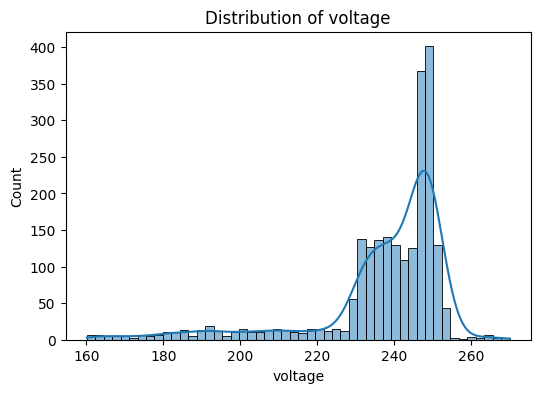

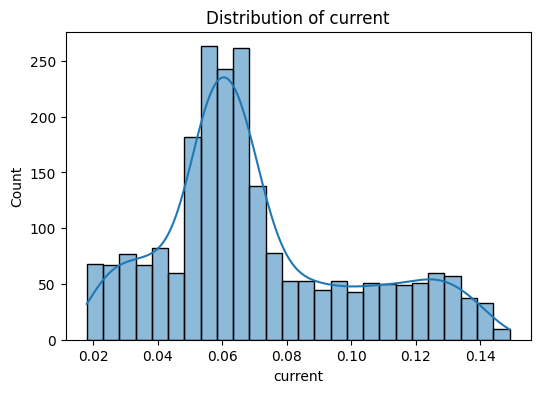

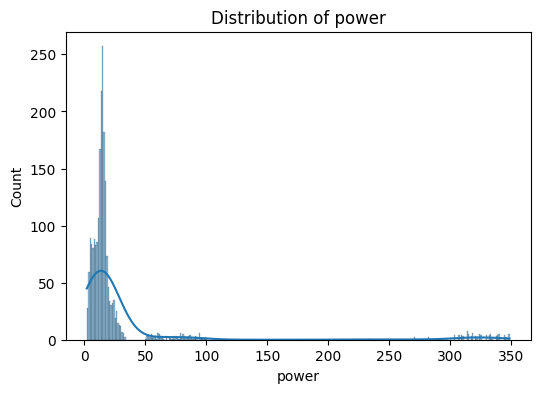

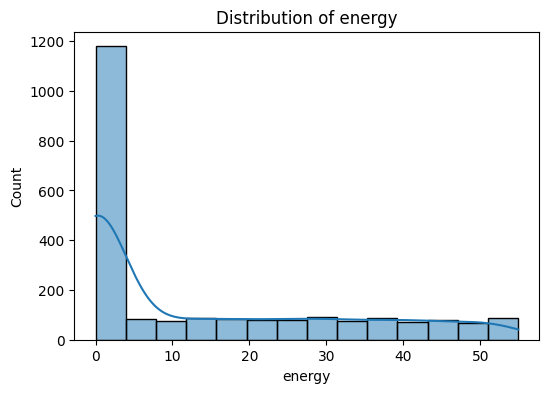

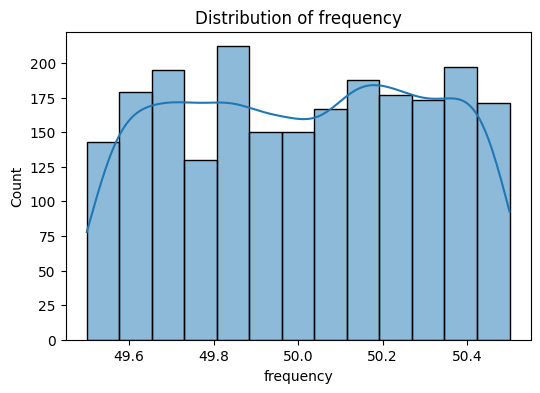

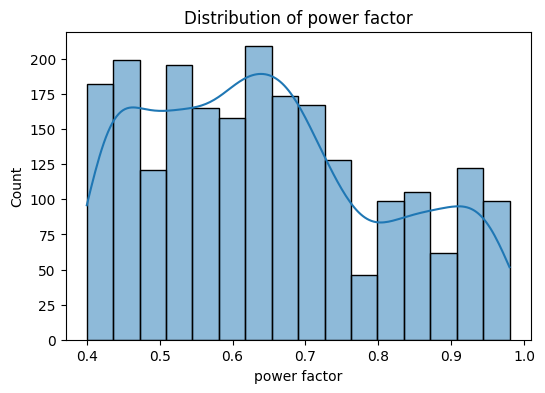

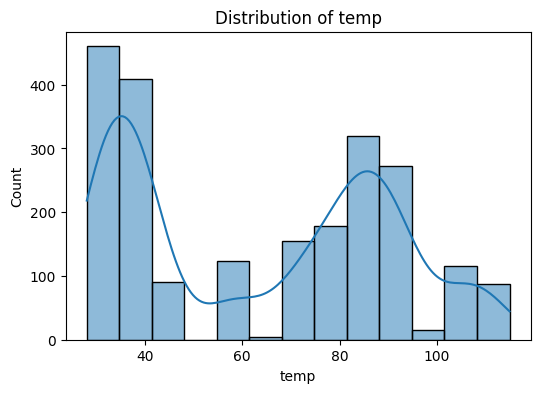

In [68]:
#Use histograms or boxplots to visualize distributions and detect outliers.

import seaborn as sns
import matplotlib.pyplot as plt

for col in X_train.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


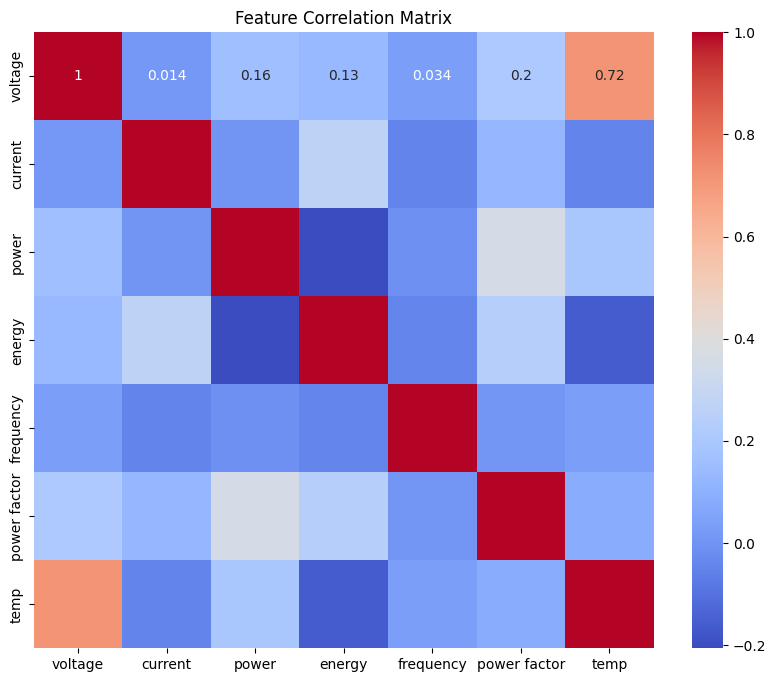

In [69]:
#Identify multicollinearity or highly correlated features.

plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


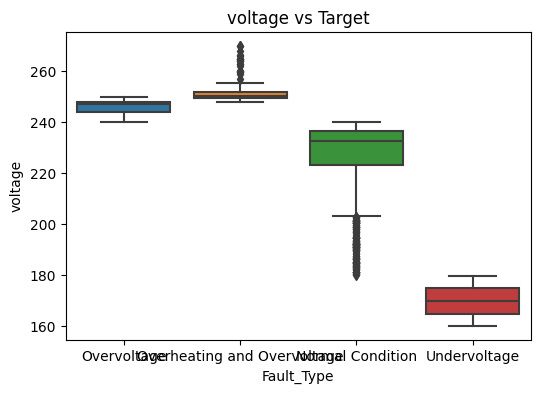

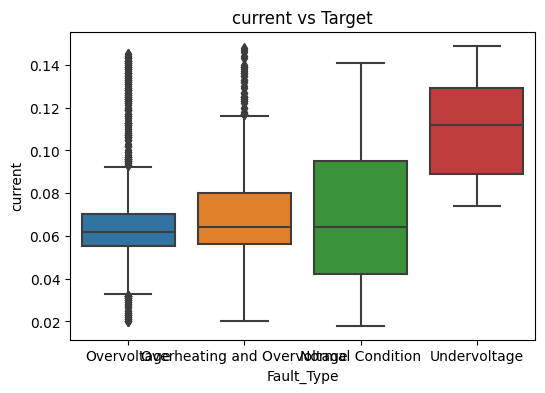

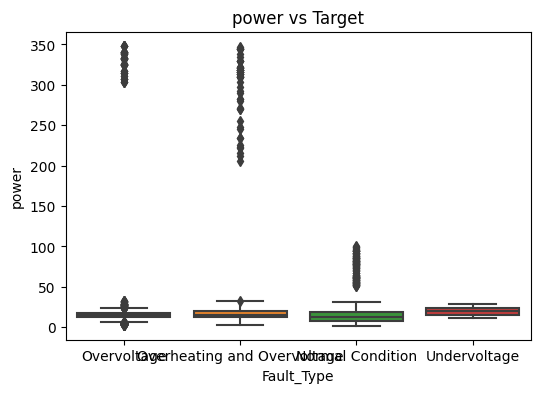

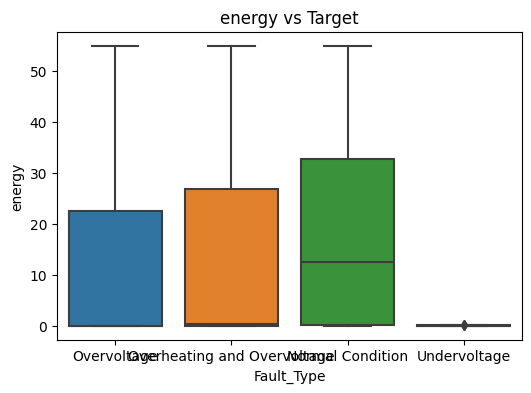

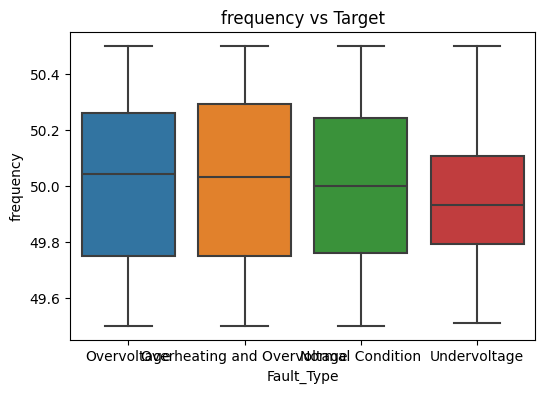

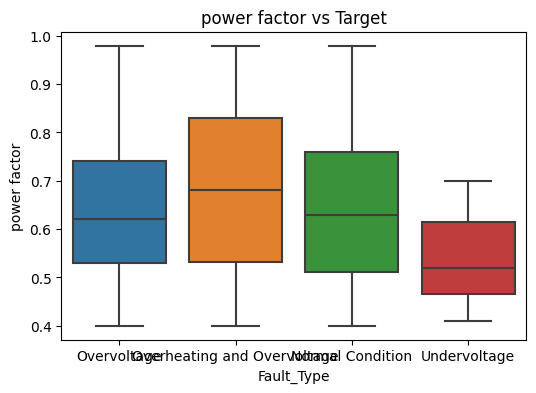

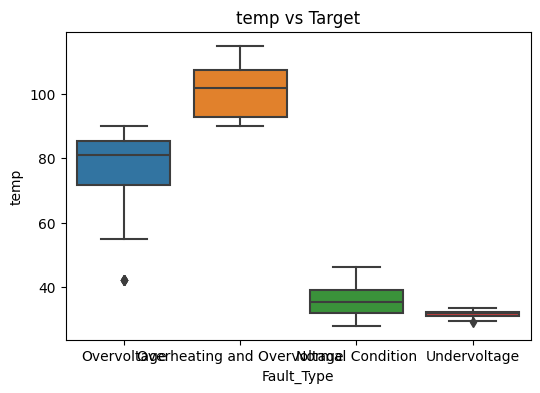

In [70]:
#Analyze how individual features impact the target.

for col in X_train.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y_train, y=X_train[col])
    plt.title(f'{col} vs Target')
    plt.show()


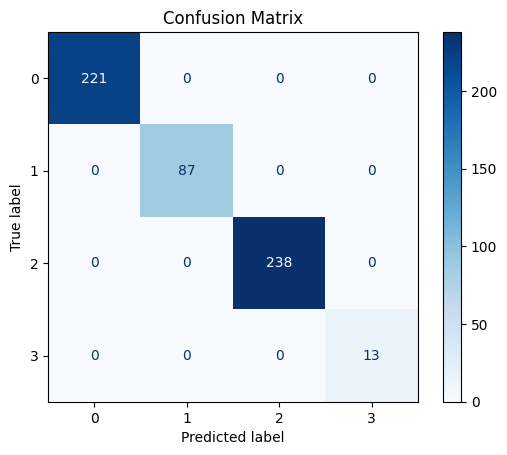

In [71]:
#Evaluate model performance on classification tasks.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [103]:
import joblib
rf_classifier.fault_cause_mapping = fault_cause_mapping
joblib.dump(rf_classifier, "rf_model.pkl")

['rf_model.pkl']

In [ ]:
# dummy

In [56]:
print("Feature names used during training:", rf_classifier.feature_names_in_)


Feature names used during training: ['voltage' 'current' 'power' 'energy' 'frequency' 'power factor' 'temp']


In [2]:
import sklearn
print(sklearn.__version__)


1.3.0


In [1]:
import numpy
import sklearn
print("Numpy version:", numpy.__version__)
print("Scikit-learn version:", sklearn.__version__)


Numpy version: 1.24.3
Scikit-learn version: 1.3.0


In [5]:
import numpy as np
import pandas as pd
import sklearn
import joblib
import requests
import time
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Print versions of the libraries
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sklearn.__version__)  # Corrected line
print("Joblib version:", joblib.__version__)
print("Requests version:", requests.__version__)
print("Streamlit version:", st.__version__)


Numpy version: 1.24.4
Pandas version: 1.5.3
Scikit-learn version: 1.3.0
Joblib version: 1.2.0
Requests version: 2.32.3
Streamlit version: 1.42.2
